# Compare the absorption of Na2(SO4)2 for different methods
Start by importing some use routine

In [1]:
import numpy                      as np
import sys, os
home_directory = os.path.join("..","..","..")
examples_directory = os.path.join(home_directory,'Examples')
sys.path.insert(0, home_directory)
from PDielec.HelperRoutines   import getMaterial
from PDielec.HelperRoutines   import calculatePowderSpectrum
from PDielec.HelperRoutines   import calculateSingleCrystalSpectrum


## Define the materials to be used.
The Na2SO42/ directory has inside it links to several other calculations.
The following is a list of the directories and the files that need to be read from each directory.
Please note these calculations are only for illustrative purposes.
They are not converged with respect to plane-wave cutoff or basis set.

In [2]:
programs    = ['AbInit',      'Castep',        'Crystal',     'Gulp',        'QE',           'Vasp']
directories = ['Na2SO42',     'Na2SO42',       'Na2SO42',     'Na2SO42',     'Na2SO42',      'Na2SO42']
files =       ['Na2SO42.out', 'phonon.castep', 'Na2SO42.out', 'na2so42.gout','Na2SO42.dynG', 'OUTCAR']

## Create a material for each calculation

In [3]:
materials = []
for program, directory, file in zip(programs,directories,files):
    material = getMaterial(os.path.join(examples_directory,program,directory,file))
    materials.append(material)

## Calculate the absorptions for each material using a volume fraction of 0.1

In [4]:
matrix = getMaterial('ptfe')
frequencies = np.arange(0,1800,0.2)
absorptions = []
for material in materials:
    absorption,permittivity = calculatePowderSpectrum(frequencies,material,matrix,0.1)
    absorptions.append(absorption)

## Plot the absorptions

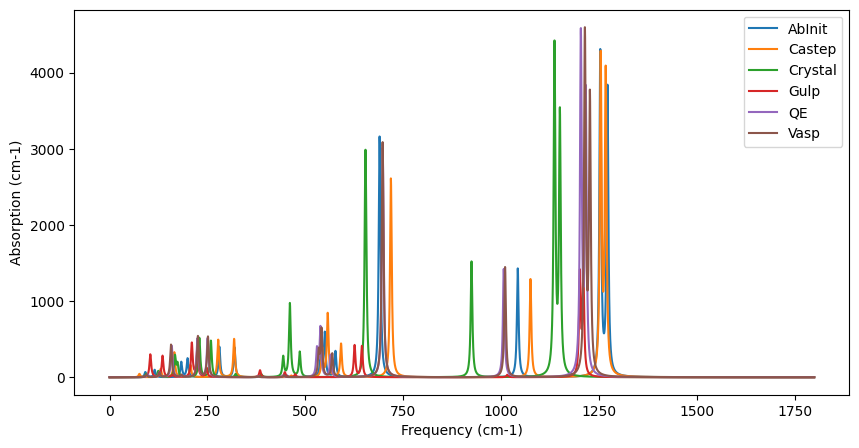

(<matplotlib.legend.Legend at 0x70ccb5b674d0>, None)

In [5]:
# %matplotlib notebook
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5)) # set the size of the figure
for name,absorption in zip(programs,absorptions):
    plt.plot(frequencies, absorption,label=name)
plt.xlabel('Frequency (cm-1)')
plt.ylabel('Absorption (cm-1)')
plt.legend(), plt.show()